# Business Understanding
- The company is diversifying its portfolio by entering the aviation industry, aiming to purchase and operate airplanes for both commercial and private use. To support this expansion, it is critical to assess the risks associated with different aircraft. The objective is to identify the aircraft models and manufacturers with the lowest risks, analyze factors contributing to accidents, and provide actionable insights to guide the aviation division's purchasing decisions.

# Objectives:

1. To identify aircraft make and models with the **highest** accident risks.
2. Analyze trends in aviation accidents to understand risk changes for specific aircraft models over time.
3. Assess operational factors affecting accident risks for different aircraft models to improve safety decisions.
    

# Import Libraries 

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.io as pio

pio.renderers.default = "svg"

#from plotly.offline import plot, iplot, init_notebook_mode
#import plotly.graph_objs as go
#init_notebook_mode(connected=False)

# Display all columns(max of 50 columns: this number is abitrary)
pd.set_option("display.max_columns", 50)

In [2]:
# Import dataset 
df = pd.read_csv(r"/home/western/Documents/Data/AviationData.csv", encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Dataframe info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Subset to only work with top 10 aircrafts 
- Only work with top 15 most used airplanes 

In [4]:
# Find the top 10 most common airplane makes
top_makes = df['Make'].value_counts().head(15).index

top_makes

# Filter the DataFrame to only include rows with these top makes
df = df[df['Make'].isin(top_makes)]



## Subset to work with selected rows
- Select the top 100 countries with airplane accidents and incidents 

In [5]:
# Get the top 100 countries by accident and incident 
top_countries = df['Country'].value_counts().index[:100]

# Filter to only include rows where country is in top 100 list  
df = df[df['Country'].isin(top_countries)]

# Remove rows wheer country is blank
df = df[df['Country'].notna() & df['Country'].str.strip() !=""]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 57322 entries, 1 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                57322 non-null  object 
 1   Investigation.Type      57322 non-null  object 
 2   Accident.Number         57322 non-null  object 
 3   Event.Date              57322 non-null  object 
 4   Location                57294 non-null  object 
 5   Country                 57322 non-null  object 
 6   Latitude                18450 non-null  object 
 7   Longitude               18447 non-null  object 
 8   Airport.Code            33250 non-null  object 
 9   Airport.Name            35079 non-null  object 
 10  Injury.Severity         56757 non-null  object 
 11  Aircraft.damage         55731 non-null  object 
 12  Aircraft.Category       17380 non-null  object 
 13  Registration.Number     56469 non-null  object 
 14  Make                    57322 non-null  obj

# Data Cleaning 

### Check for duplicates 

In [6]:
df.duplicated().sum()


0

- **Observations**
    1. There are no duplicated rows in the dataframe

### Parse correct dtypes


In [7]:
# Convert Event.Date to a datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce', dayfirst=False)


## Checking for Null values 
- The dataset had missing values


In [8]:
# Missing values 
missing_entries = df.isnull().sum()

# Calculate percentages 
percent_missing_records = (missing_entries / len(df)) * 100

missing_records_df = pd.DataFrame({
    'missing_entries': missing_entries,
    'percentage (%)': percent_missing_records
})

missing_records_df[4:9]

,missing_entries,percentage (%)
Location,28,0.048847
Country,0,0.000000
Latitude,38872,67.813405
Longitude,38875,67.818639
Airport.Code,24072,41.994348


### Dropping columns
- Dropped all columns with missing values greater than 60%. Imputing these columns would result in data skewness.
- Some columns are irrelavant within the confines of the objectives and were dropped
- Drop location and use country instead

In [9]:
# Drop columns 
df = df.drop(columns=['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description',
                      'Schedule', 'Air.carrier', 'Airport.Code', 'Airport.Name', 
                      'Publication.Date', 'Registration.Number', 'Report.Status', 'Location' 
                     ], errors='ignore')


## Imputation 
- Impute missing values based on probability distribution of existing categories or columns 
- This preserves variability of the data unlike deterministic methods reducing bias in downstream analysis 
- For numeric variables, missing values are sampled from distribution of observed data 
- For categorical variables, missing values are sampled based on observed frequency distribution


### Imputation of categorical columns 

In [10]:

# List of categorical columns for imputation (removing duplicate 'Broad.phase.of.flight')
categorical_columns = [
    'Aircraft.damage', 'Engine.Type', 'Purpose.of.flight', 
    'Weather.Condition', 'Broad.phase.of.flight',
    'Make', 'Model', 'Amateur.Built'
]


def probabilistic_imputation(series, prob_dist, random_state=None):
    # Set the random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Ensure the probability distribution sums to 1
    prob_dist = prob_dist / prob_dist.sum()
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values based on the probability distribution
    sampled_values = rng.choice(prob_dist.index, size=len(missing_indices), p=prob_dist.values)
    
    # Create a copy of the series and update missing values
    series = series.copy()  # Avoid working on a slice directly
    series.loc[missing_indices] = sampled_values
    
    return series


# Perform probabilistic imputation on each column
for column in categorical_columns:
    # Calculate the probability distribution of non-missing values
    prob_distribution = df[column].value_counts(normalize=True)
    
    # Impute missing values using the probabilistic imputation function
    df[column] = probabilistic_imputation(df[column], prob_distribution, random_state=42)




### Imputing numerical columns

In [11]:
# List of numeric columns for imputation
numeric_columns = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

# Function for probabilistic imputation on numeric columns
def probabilistic_numeric_imputation(series, random_state=None):
    # Set random state for reproducibility
    rng = np.random.default_rng(random_state)
    
    # Remove NaNs and get existing values
    existing_values = series.dropna().values
    
    # Identify missing values
    missing_indices = series[series.isna()].index
    
    # Sample replacement values from existing values
    sampled_values = rng.choice(existing_values, size=len(missing_indices))
    
    # Create a copy of the series and update missing values
    series = series.copy()
    series.loc[missing_indices] = sampled_values
    
    return series

# Apply probabilistic imputation on numeric columns
for column in numeric_columns:
    df[column] = probabilistic_numeric_imputation(df[column], random_state=42)

# Check the result
print(df.isna().sum())  # Should show 0 for the specified numeric columns if all missing values are imputed

    

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Country                     0
Injury.Severity           565
Aircraft.damage             0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
dtype: int64


In [12]:
df.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,57322,57322.000000,57322.000000,57322.000000,57322.000000,57322.000000
mean,1997-11-02 23:36:42.756358656,1.153292,0.601183,0.255207,0.339713,5.013729
min,1962-07-19 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987-10-23 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1995-11-01 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2006-03-16 18:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
max,2022-12-29 00:00:00,4.000000,349.000000,161.000000,380.000000,699.000000
std,NaN,0.418223,4.881030,1.499647,2.116229,27.597089


### Replace values in columns 

In [13]:
# Replace values in 'Weather.Condition', 'Engine.Type'

df['Weather.Condition'] = df['Weather.Condition'].replace(to_replace=['UNK', 'Unk'], value='Unknown', regex=False)
df['Engine.Type'] = df['Engine.Type'].replace(to_replace=['UNK', 'Unk', 'NONE'], value='Unknown', regex=False)

# Capitalize the first letter of each word in the 'Make' column
df['Make'] = df['Make'].str.title()


In [14]:
# Ensure 'Total.Fatal.Injuries' is 0 where 'Injury.Severity' is 'Non-Fatal'
df.loc[df['Injury.Severity'] == 'Non-Fatal', 'Total.Fatal.Injuries'] = 0

# Drop the 'Injury.Severity' column
df = df.drop(columns=['Injury.Severity'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57322 entries, 1 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                57322 non-null  object        
 1   Investigation.Type      57322 non-null  object        
 2   Accident.Number         57322 non-null  object        
 3   Event.Date              57322 non-null  datetime64[ns]
 4   Country                 57322 non-null  object        
 5   Aircraft.damage         57322 non-null  object        
 6   Make                    57322 non-null  object        
 7   Model                   57322 non-null  object        
 8   Amateur.Built           57322 non-null  object        
 9   Number.of.Engines       57322 non-null  float64       
 10  Engine.Type             57322 non-null  object        
 11  Purpose.of.flight       57322 non-null  object        
 12  Total.Fatal.Injuries    57322 non-null  float64    

# Feature Engineering 
- Adding new columns to enhance exploratory data analysis 

### Combine make and model to a single column 



In [16]:
df['make_model'] = df['Make'].str.strip() + '-' + df['Model'].str.strip()

### Create seasons columns 
- Create season categories e.g winter, spring, etc
- This helps identify trends over time such as seasonal variations in accident rates 

In [17]:
# Create a function to categorize seasons 
def get_seasons(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
        
    else:
        return 'Autum'
    
# Apply function 
df['Season'] = df['Event.Date'].apply(get_seasons)

### Damage severity index

In [18]:
# Create dictionary to map aircraft damage 
damage_severity = {
    'Destroyed': 3,
    'Substantial': 4,
    'Minor': 2,
    'Unknown': 1,
}

# Apply mapping 
df['aircraft_damage_severity'] = df['Aircraft.damage'].map(damage_severity)

### Injury severity index

In [19]:
# Injury severity 

df['injury_severity_index'] = (df['Total.Fatal.Injuries'] * 3) + (df['Total.Serious.Injuries'] * 2) + (df['Total.Minor.Injuries'] * 1)

In [20]:
df['Broad.phase.of.flight'].unique()

array(['Unknown', 'Cruise', 'Approach', 'Takeoff', 'Landing', 'Taxi',
       'Descent', 'Maneuvering', 'Climb', 'Go-around', 'Other',
       'Standing'], dtype=object)

In [21]:
# Convert column names in the DataFrame to lowercase and replace '.' with '_'
df.columns = [col.lower().replace('.', '_') for col in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 57322 entries, 1 to 88888
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  57322 non-null  object        
 1   investigation_type        57322 non-null  object        
 2   accident_number           57322 non-null  object        
 3   event_date                57322 non-null  datetime64[ns]
 4   country                   57322 non-null  object        
 5   aircraft_damage           57322 non-null  object        
 6   make                      57322 non-null  object        
 7   model                     57322 non-null  object        
 8   amateur_built             57322 non-null  object        
 9   number_of_engines         57322 non-null  float64       
 10  engine_type               57322 non-null  object        
 11  purpose_of_flight         57322 non-null  object        
 12  total_fatal_injuries   

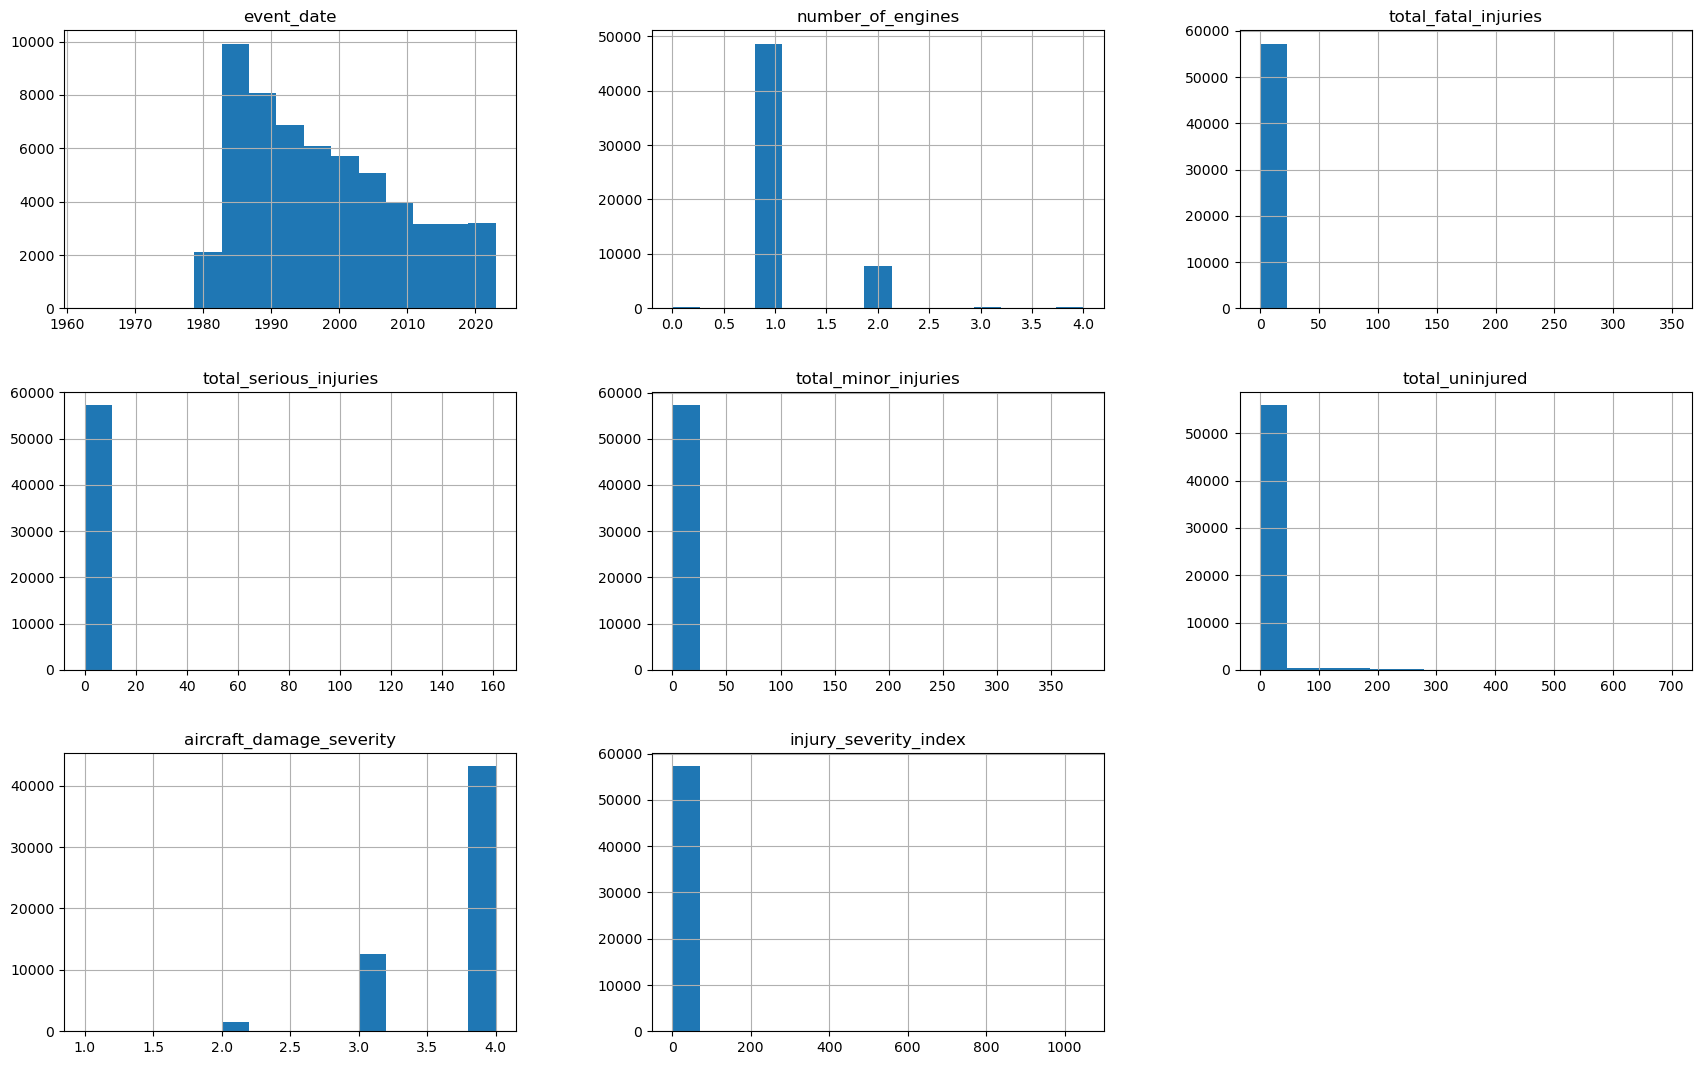

In [22]:
df.hist(bins=15, figsize=(21,13));

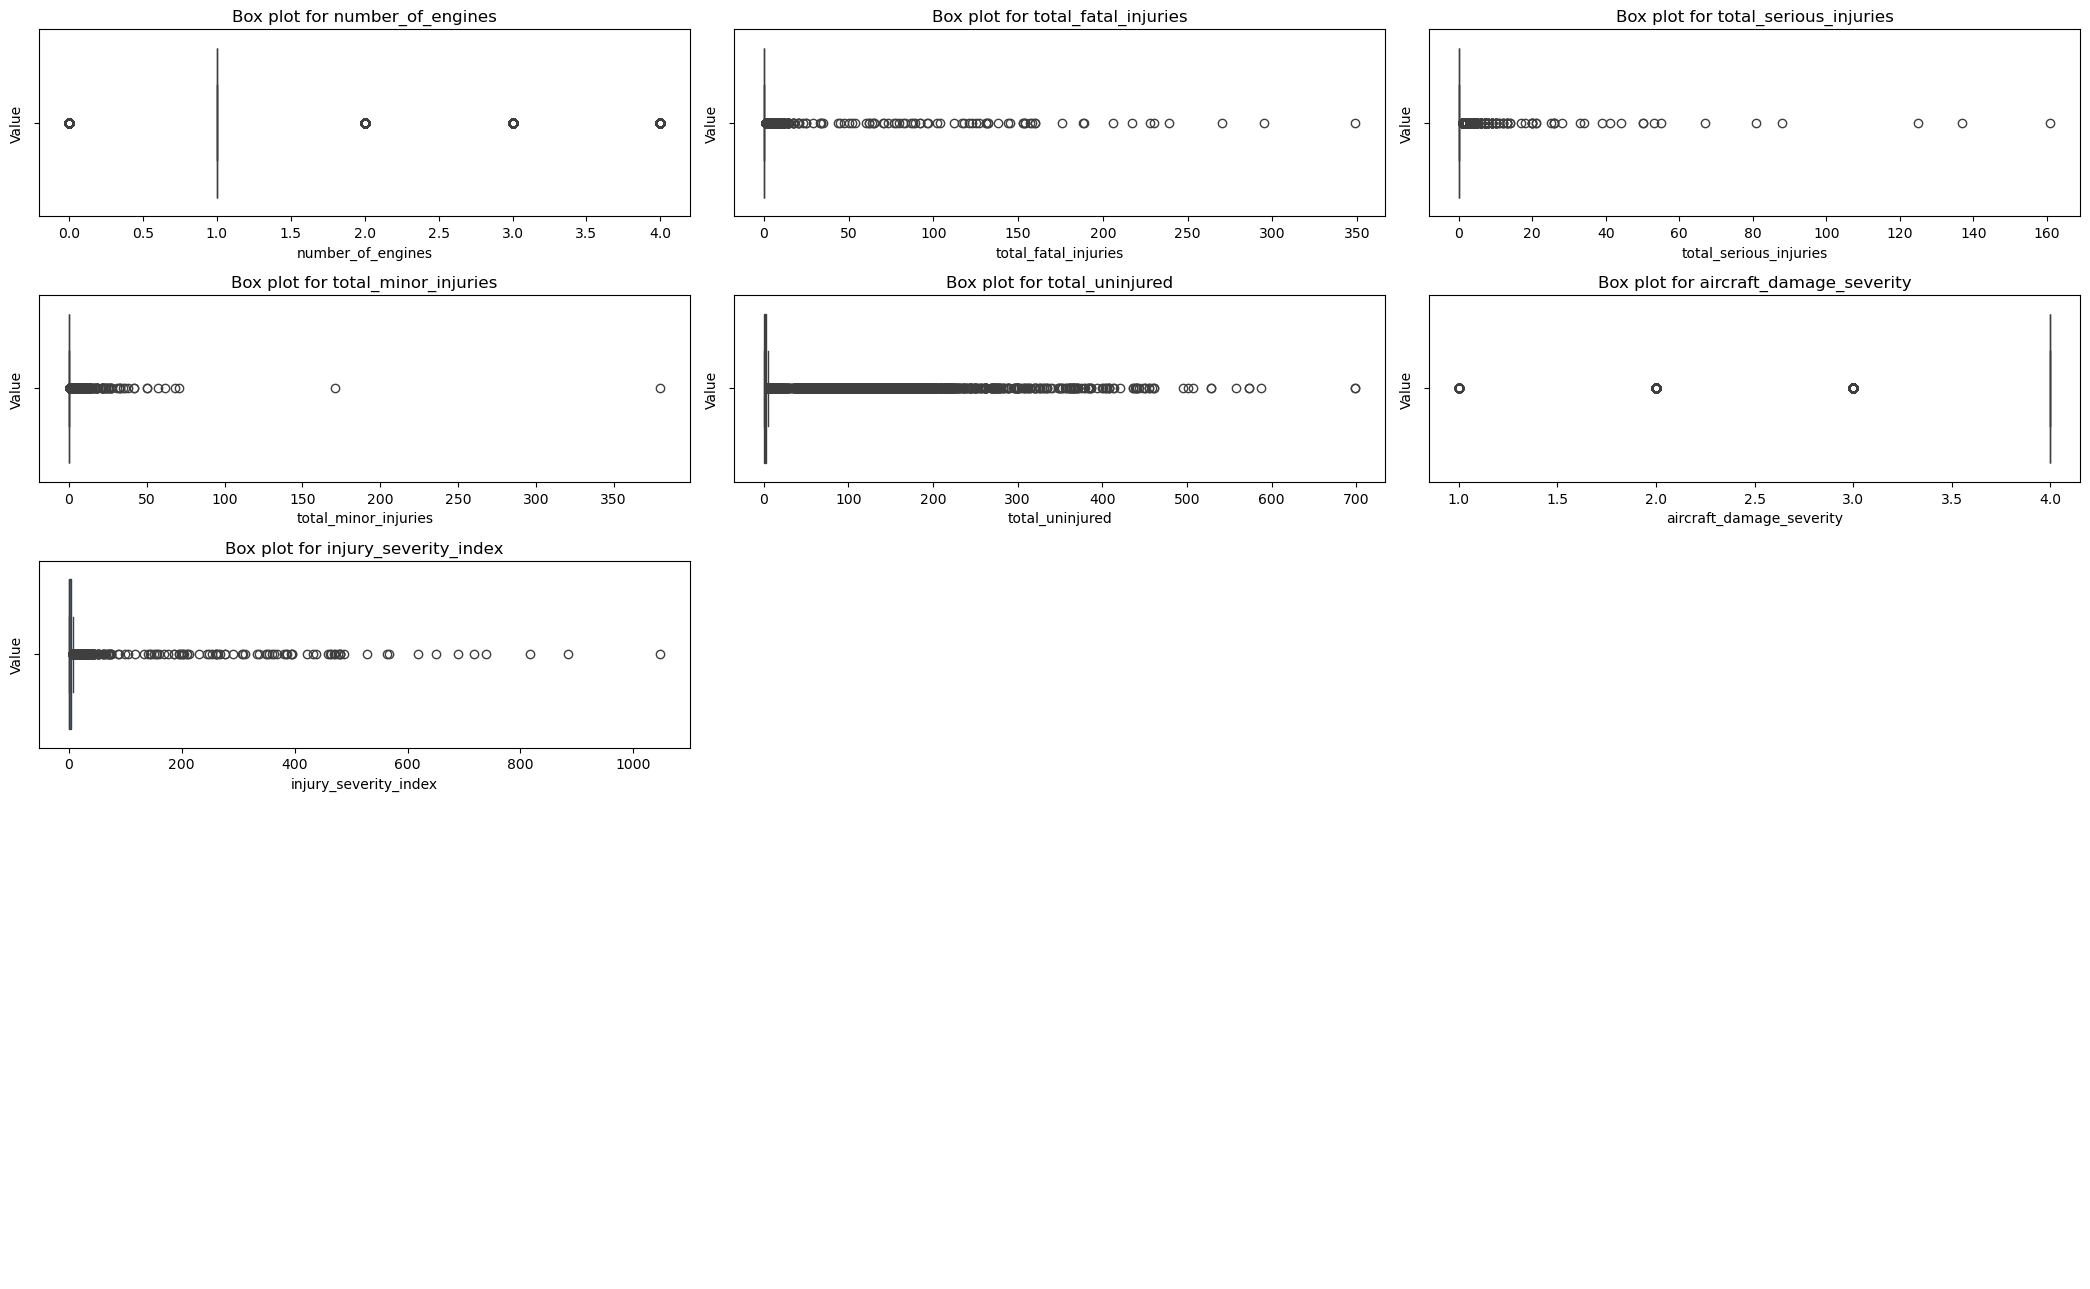

In [23]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]


# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


In [24]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.10)  # .25
q3 = numeric_data.quantile(0.90)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 57322
Number of rows after removing outliers: 53137
Number of rows removed: 4185


# Univariate Analysis

**1. Top 5 countries with most accidents**
- Rank countries with most accidents 

Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"
[60598:1127/140118.417089:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


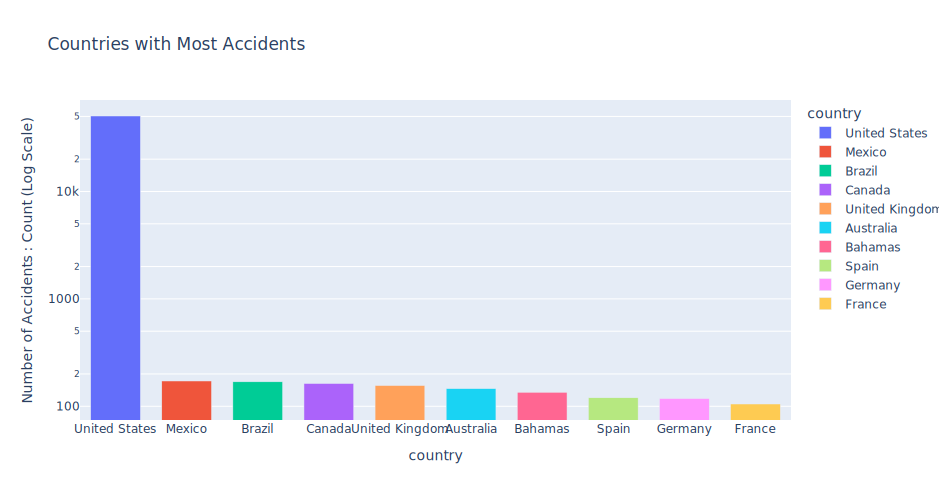

In [25]:
countries = df['country'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(countries, 
             x= 'country', 
             y = "Number of accident",
            title = 'Countries with Most Accidents', color='country')

# Update layout 
fig.update_layout(
    width = 950,
    height = 500, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Number of Accidents : Count (Log Scale)'  
    )
)



fig.show()

2. Aircraft make with most accidents 
- Rank top 15 aircraft make with most accidents 

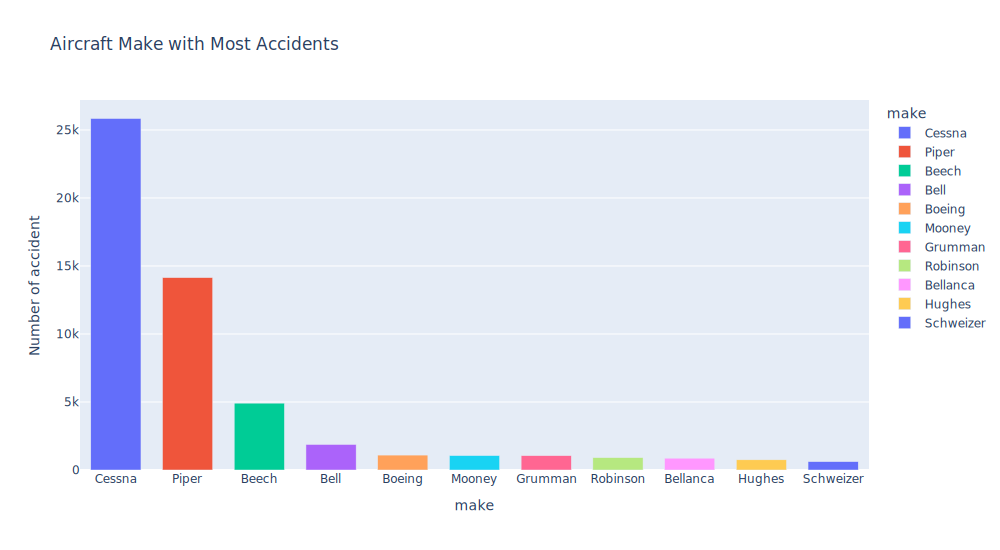

In [26]:

aircraft_make = df['make'].value_counts().reset_index(name="Number of accident")[:20]

# Plot bar graph 
fig = px.bar(aircraft_make, 
             x= 'make', 
             y = "Number of accident",
            title = 'Aircraft Make with Most Accidents', color= 'make',)

# Update layout 
fig.update_layout(
    width = 1000,
    height = 550, 
    bargap = 0.3
)
fig.show()

- Rank top 15 aircraft make-model with most accidents

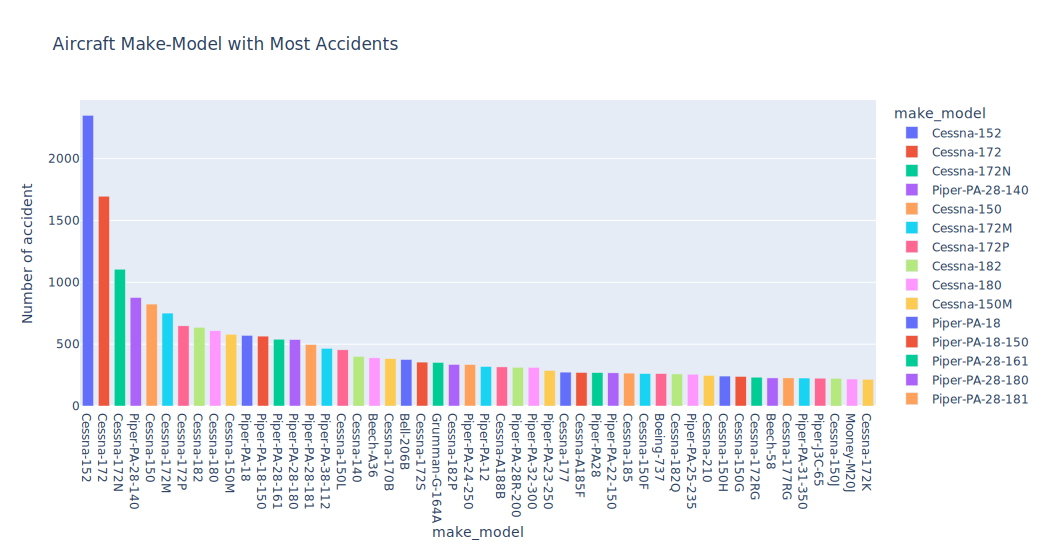

In [27]:
aircraft_make_model = df['make_model'].value_counts().reset_index(name="Number of accident")[:50]

# Plot bar graph 
fig = px.bar(aircraft_make_model, 
             x= 'make_model', 
             y = "Number of accident",
            title = 'Aircraft Make-Model with Most Accidents', color= 'make_model',)

# Update layout 
fig.update_layout(
    width = 1050,
    height = 550, 
    bargap = 0.3
)
fig.show()

### broad_phase_of_flight accidents 

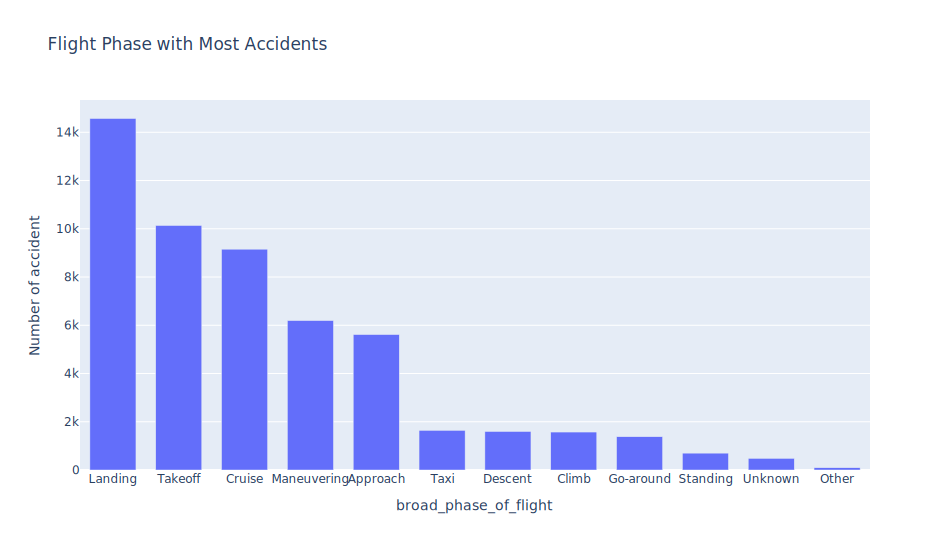

In [28]:
flight_phase = df['broad_phase_of_flight'].value_counts().reset_index(name="Number of accident")[:15]

# Plot bar graph 
fig = px.bar(flight_phase, 
             x= 'broad_phase_of_flight', 
             y = "Number of accident",
            title = 'Flight Phase with Most Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Amature Built accidents 

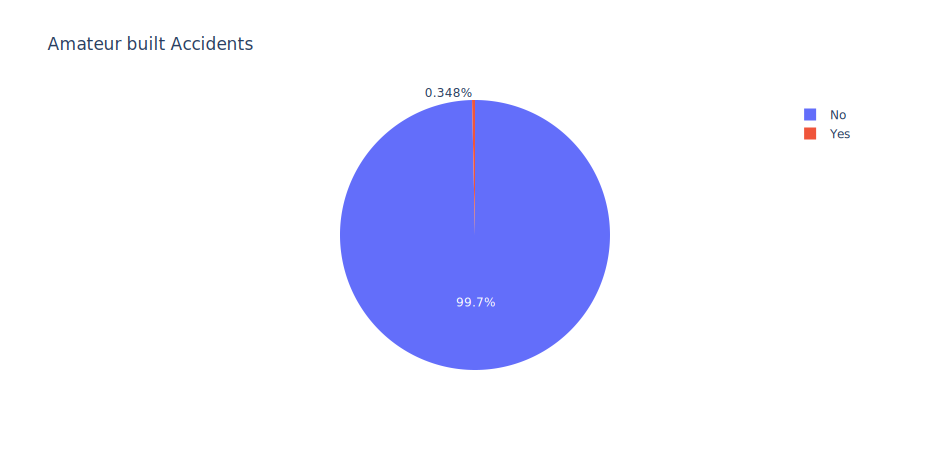

In [29]:
### Amature Built accidents 
ameteur_built = df['amateur_built'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'amateur_built', 
             values = "Number of accident",
            title = 'Amateur built Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 450, 
    bargap = 0.3
)
fig.show()


### Weather conditions


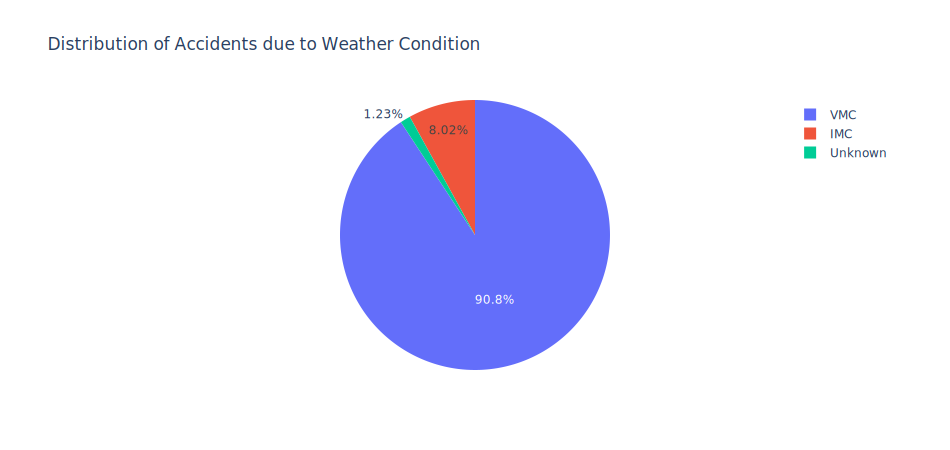

In [30]:
### Amature Built accidents 
ameteur_built = df['weather_condition'].value_counts().reset_index(name="Number of accident")

# Plot bar graph 
fig = px.pie(ameteur_built, 
             names = 'weather_condition', 
             values = "Number of accident",
            title = 'Distribution of Accidents due to Weather Condition')

# Update layout 
fig.update_layout(
    width = 950,
    height = 450, 
    bargap = 0.3
)
fig.show()


### Engine types

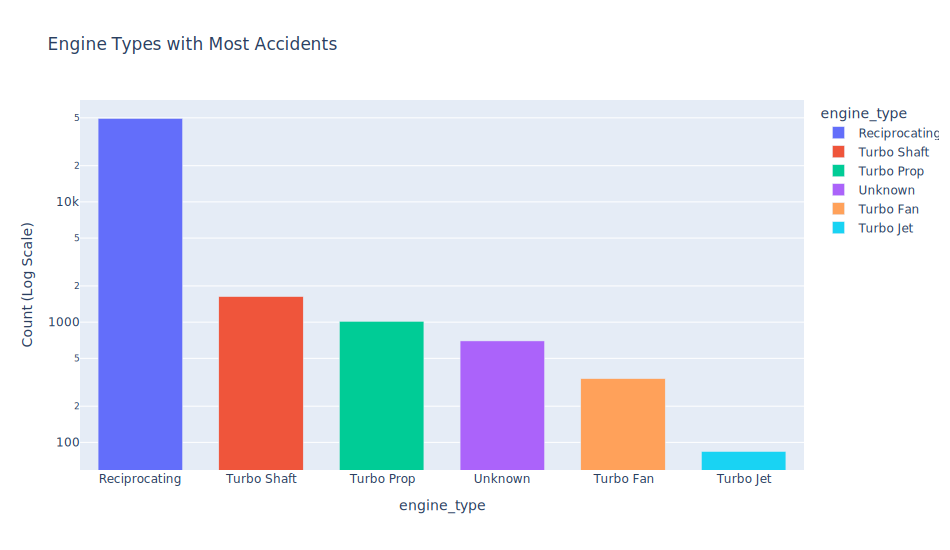

In [31]:
engine_types = df['engine_type'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(engine_types, 
             x= 'engine_type', 
             y = "Number of accident",
            title = 'Engine Types with Most Accidents',
            color = 'engine_type')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)
fig.show()

### Seasons with most accidents 

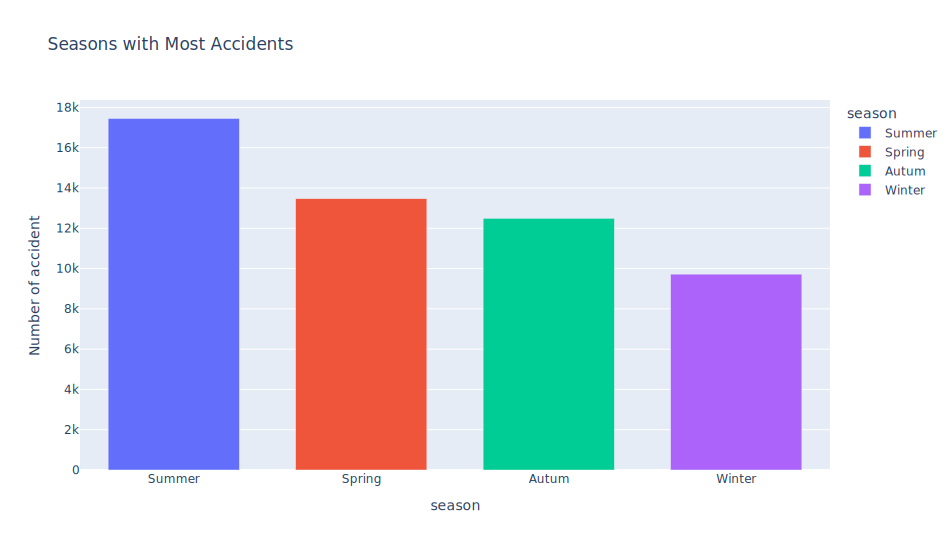

In [32]:
seasons = df['season'].value_counts().reset_index(name="Number of accident")[:6]

# Plot bar graph 
fig = px.bar(seasons, 
             x= 'season', 
             y = "Number of accident",
            title = 'Seasons with Most Accidents',
            color = 'season')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3
)
fig.show()

### Exploring the purpose of flights involved in accidents

In [33]:
df['purpose_of_flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Positioning', 'Other Work Use',
       'Flight Test', 'Air Drop', 'Air Race/show', 'Glider Tow',
       'Banner Tow', 'External Load', 'Public Aircraft - Local',
       'Public Aircraft - Federal', 'Public Aircraft - State',
       'Firefighting', 'Air Race show', 'PUBS', 'ASHO'], dtype=object)

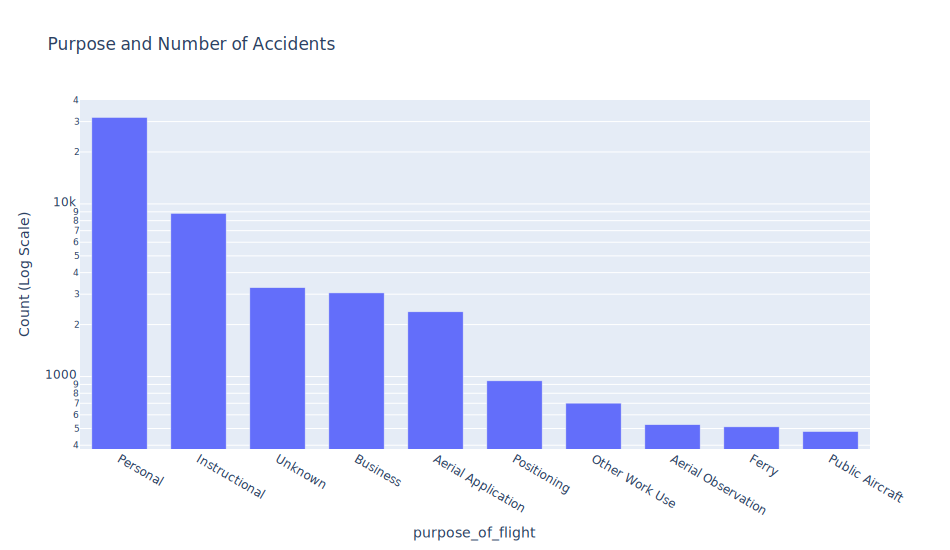

In [34]:
# Exploring the purpose of flights involved in accidents

top_10_purposes = df['purpose_of_flight'].value_counts().reset_index(name="Number of accident")[:10]

# Plot bar graph 
fig = px.bar(top_10_purposes, 
             x= 'purpose_of_flight', 
             y = "Number of accident",
            title = 'Purpose and Number of Accidents')

# Update layout 
fig.update_layout(
    width = 950,
    height = 550, 
    bargap = 0.3,
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  
    )
)
fig.show()


plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53137 entries, 1 to 88888
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  53137 non-null  object        
 1   investigation_type        53137 non-null  object        
 2   accident_number           53137 non-null  object        
 3   event_date                53137 non-null  datetime64[ns]
 4   country                   53137 non-null  object        
 5   aircraft_damage           53137 non-null  object        
 6   make                      53137 non-null  object        
 7   model                     53137 non-null  object        
 8   amateur_built             53137 non-null  object        
 9   number_of_engines         53137 non-null  float64       
 10  engine_type               53137 non-null  object        
 11  purpose_of_flight         53137 non-null  object        
 12  total_fatal_injuries   

# Bivariate Analysis 

## Injury severity index by aircraft. 

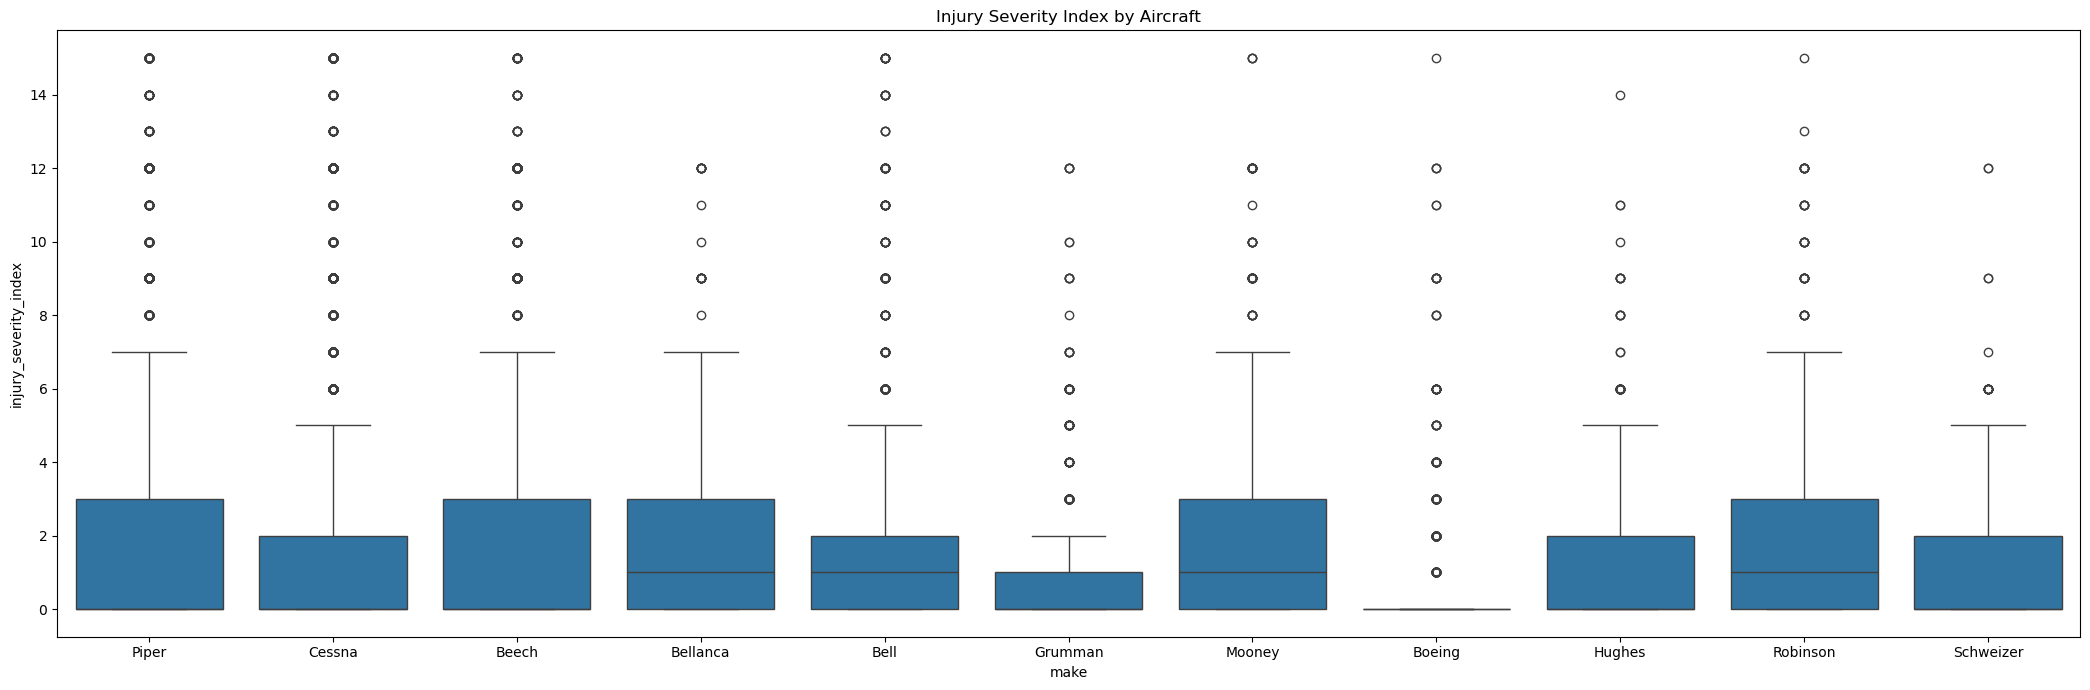

In [36]:
plt.figure(figsize=(21, 7))
sns.boxplot(x='make', y = 'injury_severity_index', data=df)
plt.title('Injury Severity Index by Aircraft')
plt.tight_layout()
plt.show()

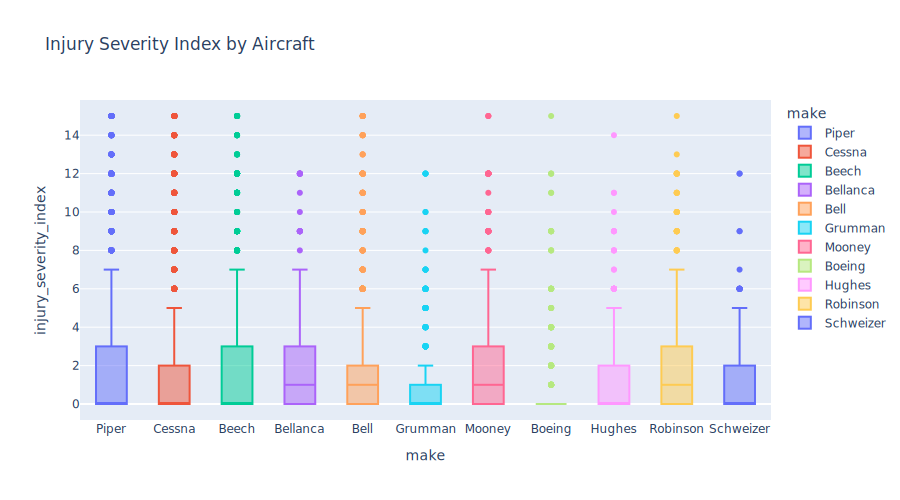

In [37]:
fig = px.box(
    df, 
    x='make', 
    y='injury_severity_index', 
    title='Injury Severity Index by Aircraft',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


# Uninjury severity

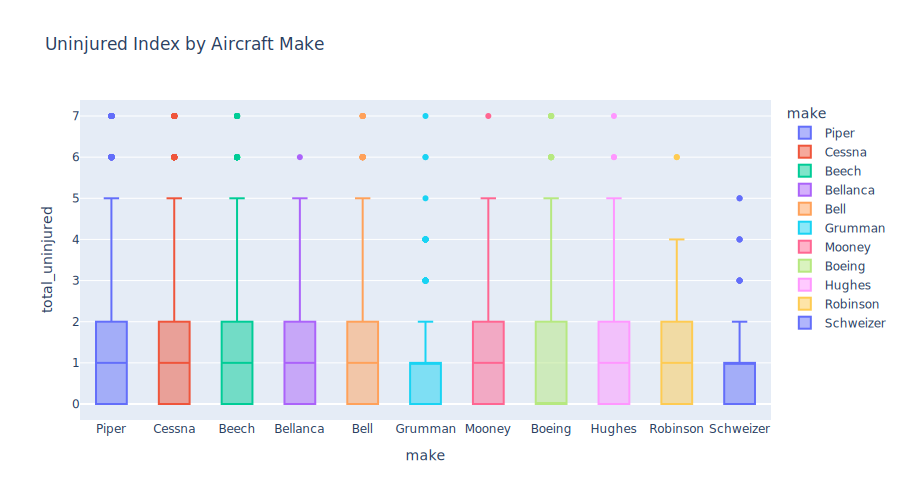

In [38]:
fig = px.box(
    df, 
    x='make', 
    y='total_uninjured', 
    title='Uninjured Index by Aircraft Make',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


#### Key Observations:
- Variation: Some makes (e.g., Robinson, Mooney) have a wider range of injury severity compared to others (e.g., Bell).
- Median: The median injury severity index varies significantly across airplane makes Some makes may have better safety features, structural integrity, or crash-resistance designs, leading to lower injury severity..
- Outliers: There are noticeable outliers for most makes, indicating incidents with much higher injury severity.

## Aircraft damage severity

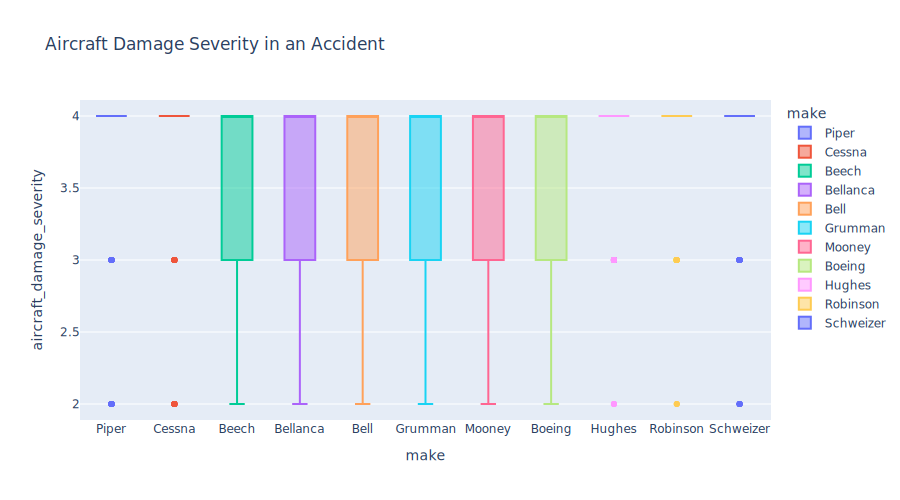

In [39]:
fig = px.box(
    df, 
    x='make', 
    y='aircraft_damage_severity', 
    title='Aircraft Damage Severity in an Accident',
    color = 'make',
    width=900, 
    height=500
)
fig.show()


### Key Observations:
- Consistency Across Makes: The median aircraft damage severity appears consistent across most airplane makes, suggesting similar outcomes in damage severity regardless of the make.
- Variation: Beech and Bell aircraft show larger variability in damage severity compared to other makes, as indicated by the taller boxes and whiskers.
- Outliers: A few makes, like Cessna and Robinson, display noticeable outliers, indicating instances with significantly higher or lower damage severity than the norm.
- Clusters at Higher Severity: Most makes cluster around higher damage severity levels, suggesting that accidents often result in significant aircraft damage across different makes.

### Aircraft vs Engine 
- Compare the most used engine type for most aricrafts 

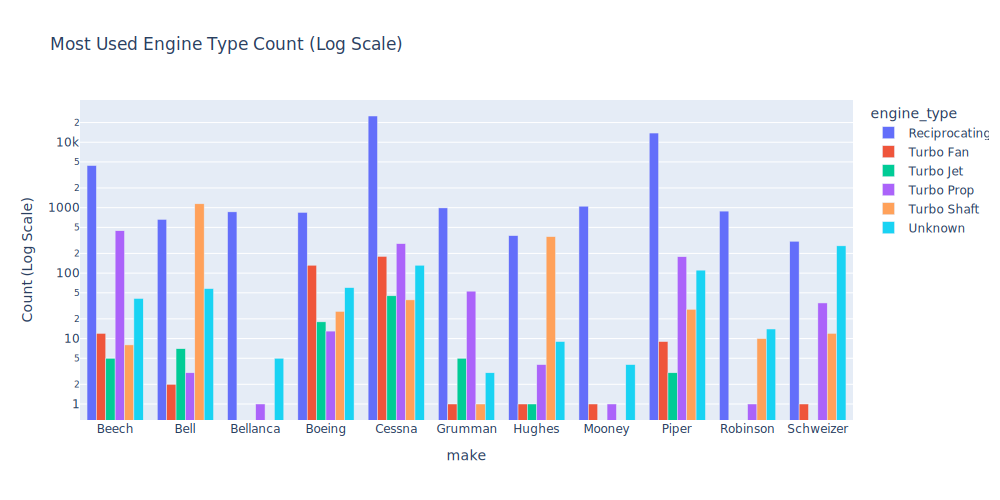

In [40]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['engine_type']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='engine_type', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='engine_type',
    barmode='group',
    title='Most Used Engine Type Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

In [41]:
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'country', 'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'make_model', 'season',
       'aircraft_damage_severity', 'injury_severity_index'],
      dtype='object')

## Aircraft vs Season 


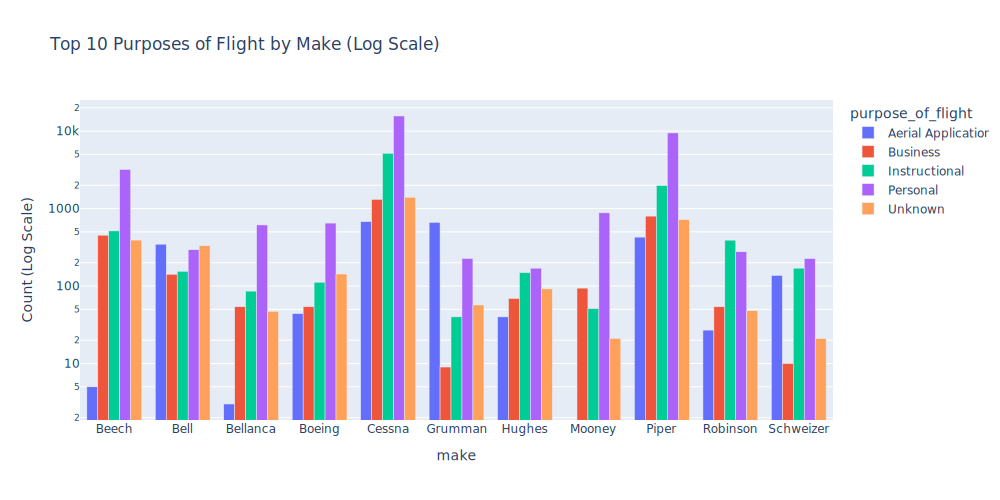

In [42]:

# Get the top 10 most frequent purposes
top_purposes = df['purpose_of_flight'].value_counts().head(5).index

# Filter the DataFrame to include only the top purposes
filtered_df = df[df['purpose_of_flight'].isin(top_purposes)]

# Create the crosstab
cross_tab = pd.crosstab(filtered_df['make'], filtered_df['purpose_of_flight']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='purpose_of_flight', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='purpose_of_flight',
    barmode='group',
    title='Top 10 Purposes of Flight by Make (Log Scale)',
    width=1000,
    height=500
)

# Optionally use a logarithmic scale for the y-axis
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)

# Show the figure
fig.show()


## Make and Amature builts 

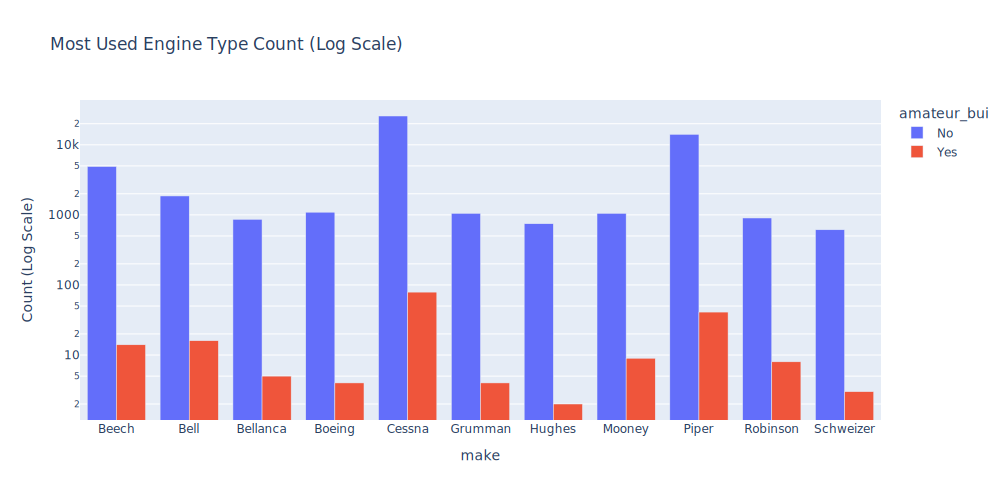

In [49]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['amateur_built']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='amateur_built', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='amateur_built',
    barmode='group',
    title='Most Used Engine Type Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

## Make and weather 

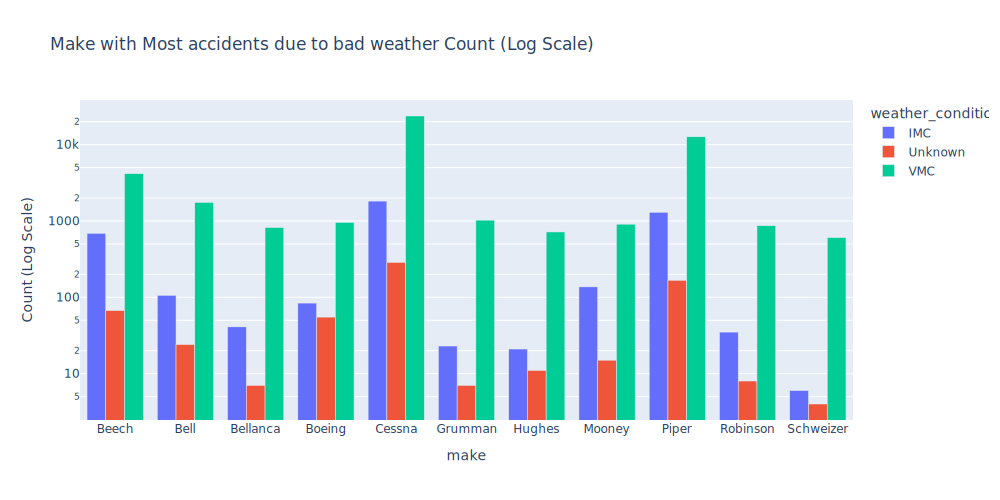

In [52]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['weather_condition']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='weather_condition', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='weather_condition',
    barmode='group',
    title='Make with Most accidents due to bad weather Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

## Make and Broad phase of flight

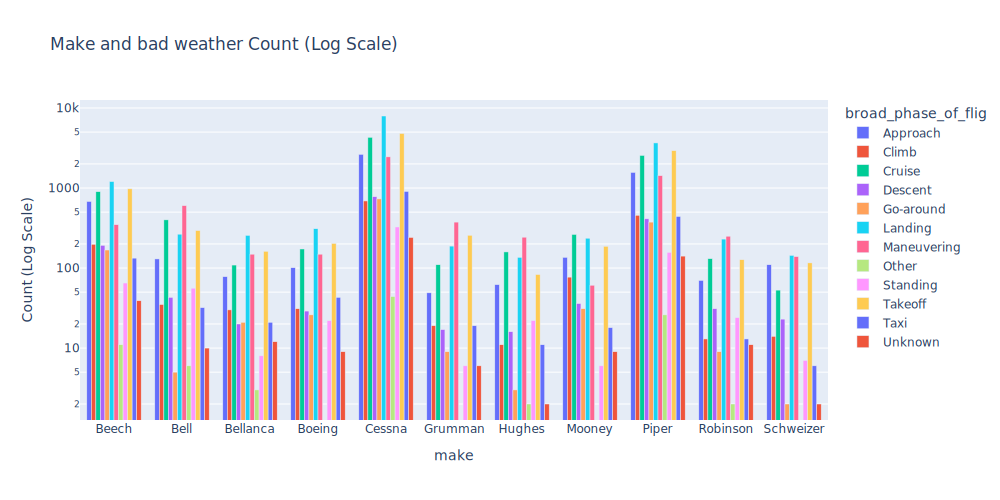

In [54]:
# Create the crosstab
cross_tab = pd.crosstab(df['make'], df['broad_phase_of_flight']).reset_index()

# Melt the crosstab to get data in long format
cross_tab_melted = cross_tab.melt(id_vars='make', var_name='broad_phase_of_flight', value_name='count')

# Create the bar chart
fig = px.bar(
    cross_tab_melted,
    x='make',
    y='count',
    color='broad_phase_of_flight',
    barmode='group',
    title='Make and bad weather Count (Log Scale)', 
    width=1000, 
    height=500
)
fig.update_layout(
    yaxis=dict(
        type='log',  # Set the y-axis to logarithmic scale
        title='Count (Log Scale)'  # Optional: add a title for clarity
    )
)


# Show the figure
fig.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53137 entries, 1 to 88888
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   event_id                  53137 non-null  object        
 1   investigation_type        53137 non-null  object        
 2   accident_number           53137 non-null  object        
 3   event_date                53137 non-null  datetime64[ns]
 4   country                   53137 non-null  object        
 5   aircraft_damage           53137 non-null  object        
 6   make                      53137 non-null  object        
 7   model                     53137 non-null  object        
 8   amateur_built             53137 non-null  object        
 9   number_of_engines         53137 non-null  float64       
 10  engine_type               53137 non-null  object        
 11  purpose_of_flight         53137 non-null  object        
 12  total_fatal_injuries   